In [1]:
from accelerator import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drift_l = 5  # m
focal_length = 10  # meters

FODO_cell = [QuadrupoleThin(focal_length), Drift(drift_l), QuadrupoleThin(-focal_length), Drift(drift_l)]
fodo = Lattice(FODO_cell)
fodo

Lattice([QuadrupoleThin(f=10, name='quadrupole_thin_0'), Drift(l=5, name='drift_0'), QuadrupoleThin(f=-10, name='quadrupole_thin_1'), Drift(l=5, name='drift_1')])

In [3]:
n_fodo = 8
n_dipole = n_fodo # one dipole after each fodo
curve_perimeter = 120  # m
dip_theta = 2 * np.pi / n_dipole
dip_rho = curve_perimeter / (n_dipole * dip_theta)
drift_l = 10

In [4]:
dip = Dipole(dip_rho, dip_theta)

In [5]:
sequence = (FODO_cell + [dip, Drift(drift_l)]) * n_fodo
lattice = Lattice(sequence)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

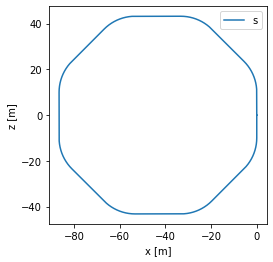

In [6]:
lattice.plot.top_down()

In [7]:
lattice.m_h.dispersion_solution

array([[12.73888596],
       [ 0.34517306],
       [ 1.        ]])

In [8]:
d, d_prime, dp, s = lattice.transport(phasespace=lattice.m_h.dispersion_solution)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

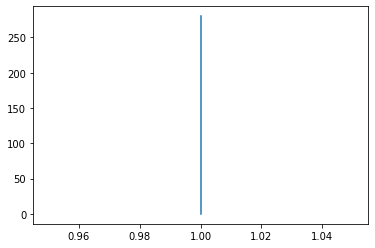

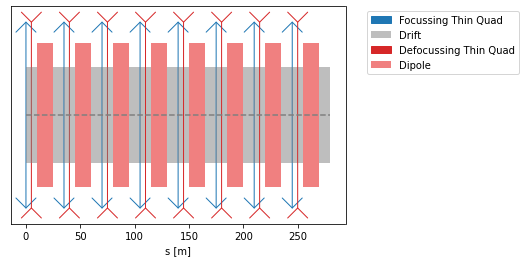

In [9]:
plt.plot(s, d)
lattice.plot()

# FODO dispersion

In [10]:
cirumference = 1000  # meters
proton_energy = 15  # GeV
dipole_length = 5  # meters
dipole_B_max = 2  # T

In [11]:
n_cells = 8  # ??
dipole_angle = np.pi / 16  # ??

In [12]:
quad_length = 3
quad_strength = 8.89e-3 / quad_length

dipole_length = 5
dipole_angle = np.pi / 16
dipole_bending_radius = dipole_length / dipole_angle

# reduce the drift lengths to compensate for the now thick elements
drift_length = (cirumference / n_cells - (2 * quad_length) - (4 * dipole_length)) / 6

In [13]:
quad_f = Quadrupole(quad_strength, quad_length, name="quad_f")
quad_d = Quadrupole(-quad_strength, quad_length, name="quad_d")

dipole = Dipole(dipole_bending_radius, dipole_angle)

drift = Drift(drift_length)
# We take the same FODO as exercise 1 and add some quadupoles
FODO_thick = Lattice([quad_f, drift, dipole, drift, dipole, drift,
                      quad_d, drift, dipole, drift, dipole, drift])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

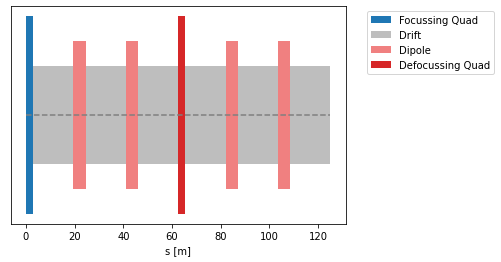

In [14]:
FODO_thick.plot()

In [15]:
FODO_thick.m_h

TransferMatrix([[-8.20504789e-01,  7.57249882e+01,  4.01643531e+01],
                [-1.13043185e-02, -1.75478091e-01,  4.47934367e-01],
                [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [16]:
FODO_thick.m_h.dispersion_solution

array([[27.08030887],
       [ 0.12064022],
       [ 1.        ]])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

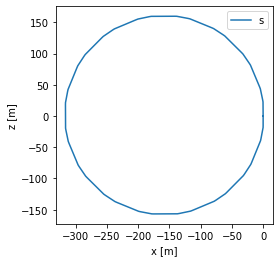

In [17]:
(FODO_thick * 8).plot.top_down()

In [18]:
disp, *_, s = FODO_thick.transport(FODO_thick.m_h.dispersion_solution)

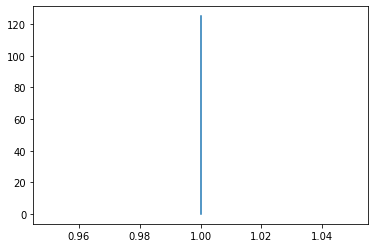

In [19]:
plt.plot(s, disp)

In [20]:
FODO_thick.m_h

TransferMatrix([[-8.20504789e-01,  7.57249882e+01,  4.01643531e+01],
                [-1.13043185e-02, -1.75478091e-01,  4.47934367e-01],
                [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [21]:
FODO_thick.m_h.dispersion_solution

array([[27.08030887],
       [ 0.12064022],
       [ 1.        ]])

# particles with energy spread

In [22]:
beam = Beam(n_particles=50, sigma_energy=1000)
beam

Beam(
energy=6500000.0,
mass=938.27208816,
n_particles=50,
emittance=(3.5e-06, 3.5e-06),
sigma_energy=1000,
sampling='bigaussian')

In [23]:
transported = FODO_thick.transport(phasespace=beam.match(FODO_thick.m_h.twiss_solution))

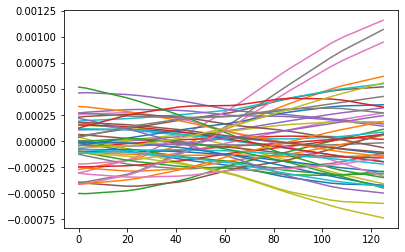

In [24]:
plt.plot(transported.s, transported.u.T);

In [25]:
s, disp, _, _, = FODO_thick.transport(phasespace=FODO_thick.m_h.dispersion_solution)

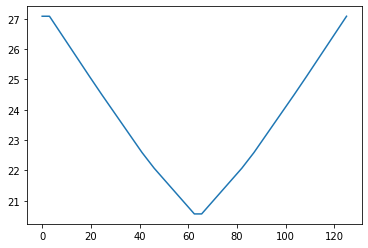

In [26]:
plt.plot(s, disp)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

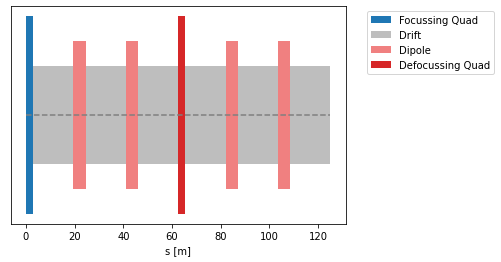

In [27]:
FODO_thick.plot()

# dp/p orbit

In [28]:
lat = Lattice([Dipole(1, np.pi/2)])

In [29]:
s, x, x_prime, _ = lat.slice(Dipole, 100).transport(phasespace=[[0, 0.1], [0, 0], [0, 0.1]])

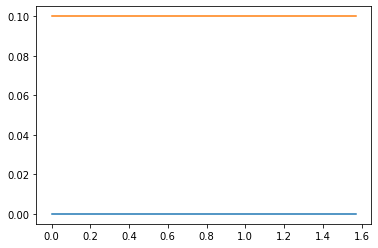

In [30]:
plt.plot(s, x.T)

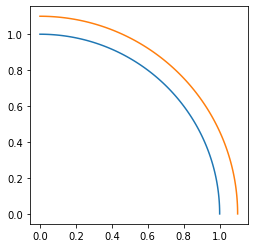

In [31]:
# top down view, projecting around the bend
x_circle = np.cos(s) + x * np.cos(s)
y_circle = np.sin(s) + x * np.sin(s)
fig, ax = plt.subplots(1, 1)
ax.plot(x_circle.T, y_circle.T)
ax.set_aspect("equal")